# Outcome
- 1 <br/>
call option price: 5.876024233827607  
put option price: 5.377272153095845
- 2 <br/>
call option price: 2.339420513720004  
put option price: 11.790793224915063
- 3 <br/>
call option price: 8.433318690109608  
put option price: 7.438302065026413
- 4 <br/>
call option price: 8.677645562336004  
put option price: 8.178893481604248
- 5 <br/>
call option price: 6.120654113455842  
put option price: 5.1256374883726465
### Comments
The **call option** price is positively correlated to maturity, volatility and risk free rate but negatively correlated to strike price;  
The **put option** price is positively correlated to strike price, maturity and volatility, but negatively correlated to risk free rate.

# Source Code

In [2]:
pip install scipy plotly

Note: you may need to restart the kernel to use updated packages.


In [52]:
import math
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## black-scholes
$$ d_1=\frac{ln(\frac{S_0}{K})+(r+\frac{1}{2}\sigma^2)T}{\sigma\sqrt{T}} $$  
$$ d_2=d_1-\sigma\sqrt{T} $$
$$ p=Ke^{-rT}N(-d_2)-SN(-d_1) $$

In [41]:
#define blackScholes
class BlackScholesModel:
    def __init__(self, S, K, t, T, sigma, r):
        self.S = S         # Underlying asset price
        self.K = K         # Option strike price
        self.t = t         # Time to expiration in year
        self.T = T         # Option maturity
        self.sigma = sigma # Volatility of the underlying asset
        self.r = r         # Risk-free interest rate
        
    def d1(self):
        return (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma **2) * self.T) / (self.sigma * np.sqrt(self.T))
    
    def d2(self):
        return self.d1() - self.sigma * np.sqrt(self.T)
    
    def call_option_price(self):
        return (self.S * si.norm.cdf(self.d1(), 0.0, 1.0) - self.K * np.exp(-self.r * self.T) * si.norm.cdf(self.d2(), 0.0, 1.0))
    
    def put_option_price(self):
        return (self.K * np.exp(-self.r * self.T) * si.norm.cdf(-self.d2(), 0.0, 1.0) - self.S * si.norm.cdf(-self.d1(), 0.0, 1.0))
    

In [42]:
bsm_1=BlackScholesModel(S=100, K=100, t=0, T=0.5, sigma=0.2, r=0.01)
print(f"Call Option Price:{bsm_1.call_option_price()}")
print(f"Put Option Price:{bsm_1.put_option_price()}")

Call Option Price:5.876024233827607
Put Option Price:5.377272153095845


In [43]:
bsm_2=BlackScholesModel(S=100, K=110, t=0, T=0.5, sigma=0.2, r=0.01)
print(f"Call Option Price:{bsm_2.call_option_price()}")
print(f"Put Option Price:{bsm_2.put_option_price()}")

Call Option Price:2.339420513720004
Put Option Price:11.790793224915063


In [45]:
bsm_3=BlackScholesModel(S=100, K=100, t=0, T=1.0, sigma=0.2, r=0.01)
print(f"Call Option Price:{bsm_3.call_option_price()}")
print(f"Put Option Price:{bsm_3.put_option_price()}")

Call Option Price:8.433318690109608
Put Option Price:7.438302065026413


In [48]:
bsm_4=BlackScholesModel(S=100, K=100, t=0, T=0.5, sigma=0.3, r=0.01)
print(f"Call Option Price:{bsm_4.call_option_price()}")
print(f"Put Option Price:{bsm_4.put_option_price()}")

Call Option Price:8.677645562336004
Put Option Price:8.178893481604248


In [49]:
bsm_5=BlackScholesModel(S=100, K=100, t=0, T=0.5, sigma=0.2, r=0.02)
print(f"Call Option Price:{bsm_5.call_option_price()}")
print(f"Put Option Price:{bsm_5.put_option_price()}")

Call Option Price:6.120654113455842
Put Option Price:5.1256374883726465


## how each parameter affects the call and put option values

In [82]:
def plot_option_sensitivity(bs_model, parameter, values, option_type='call'):
    prices = []
    for value in values:
        setattr(bs_model, parameter, value)
        if option_type == 'call':
            prices.append(bs_model.call_option_price())
        if option_type == 'put':
            prices.append(bs_model.put_option_price())
            
    plt.figure(figsize=(10, 5))
    plt.plot(values, prices)
    plt.title(f'{option_type.capitalize()} Option Price Sensitivity to {parameter.capitalize()}')
    plt.xlabel(parameter.capitalize())
    plt.ylabel('Option Price')
    plt.grid(True)

### strike

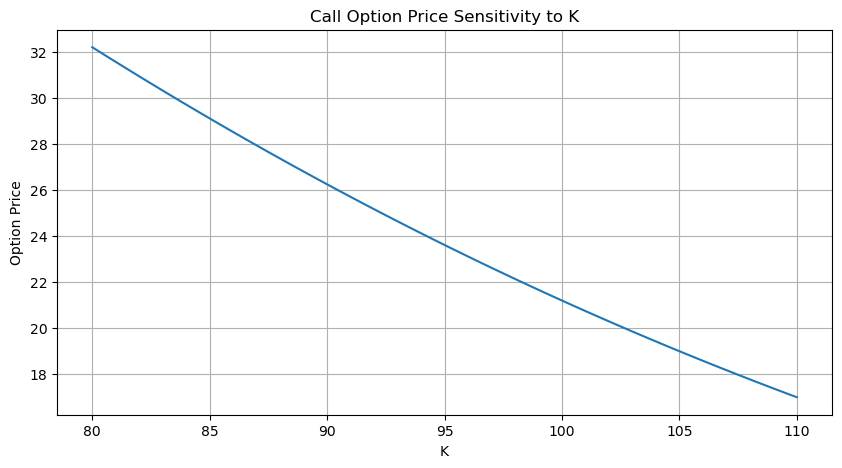

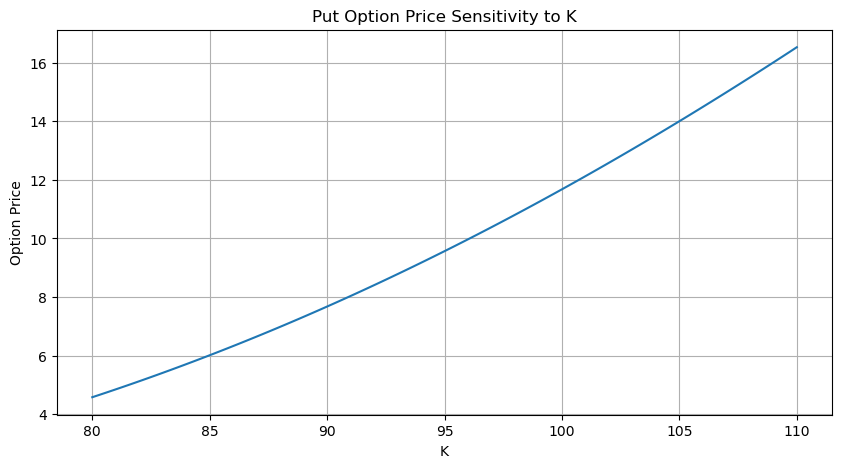

In [83]:
strikes=np.linspace(80, 110, 100)
plot_option_sensitivity(bsm_5, 'K', strikes, 'call')
plot_option_sensitivity(bsm_5, 'K', strikes, 'put')

### maturity

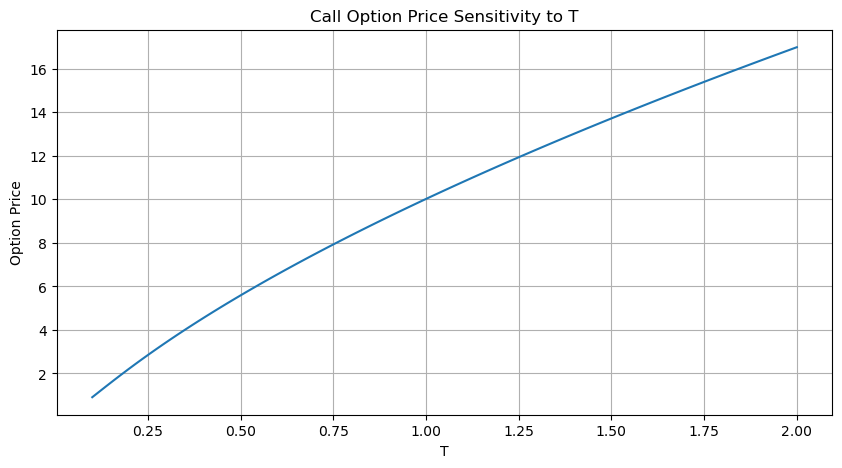

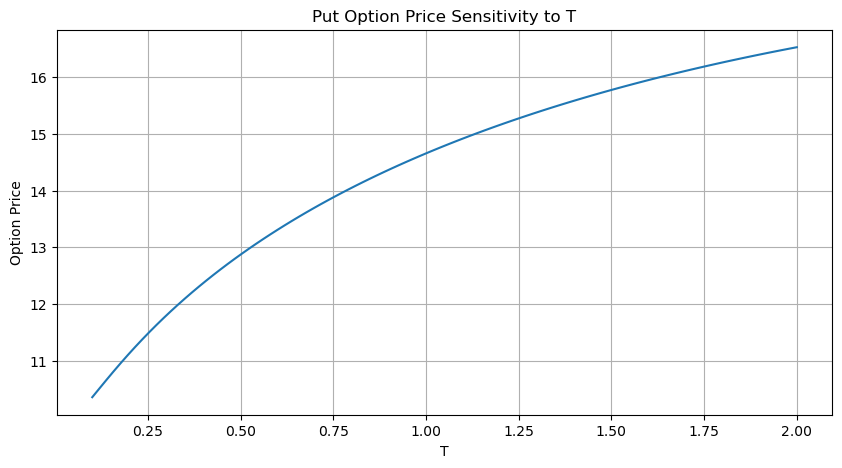

In [84]:
maturities=np.linspace(0.1, 2.0, 100)
plot_option_sensitivity(bsm_5, 'T', maturities, 'call')
plot_option_sensitivity(bsm_5, 'T', maturities, 'put')

### volatility

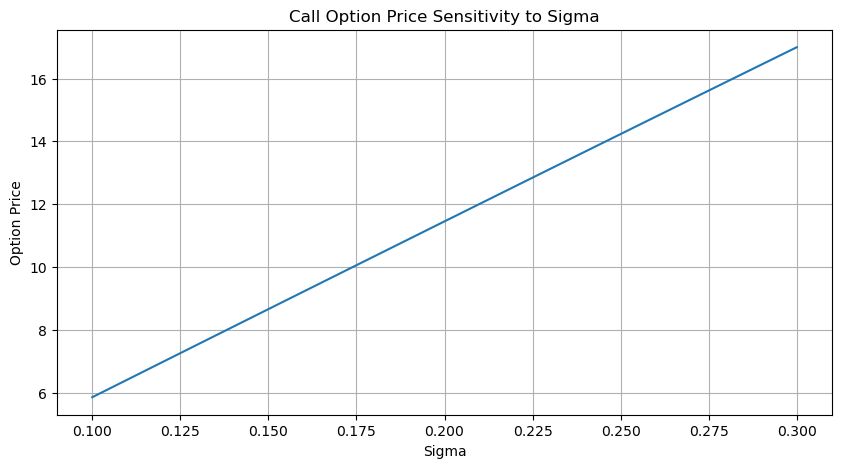

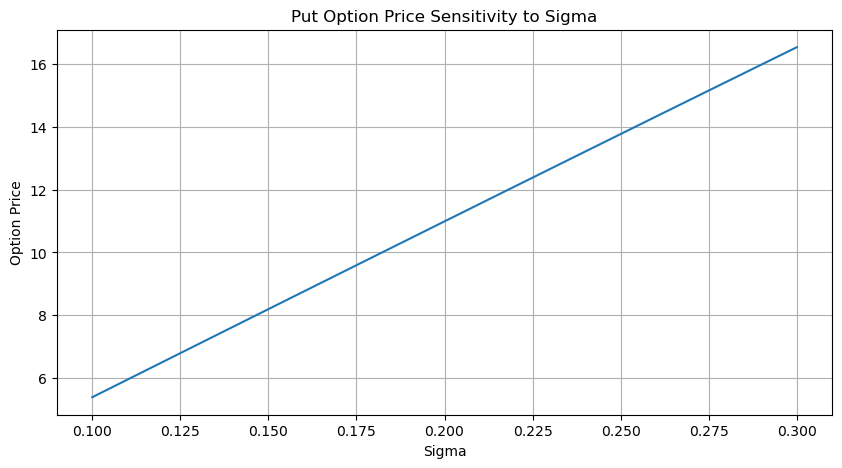

In [85]:
volatilities=np.linspace(0.1, 0.3, 100)
plot_option_sensitivity(bsm_5, 'sigma', volatilities, 'call')
plot_option_sensitivity(bsm_5, 'sigma', volatilities, 'put')

### risk free rate

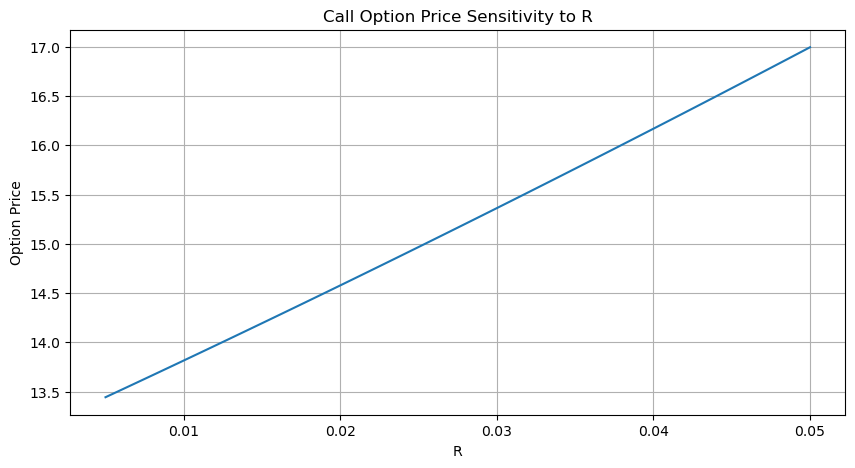

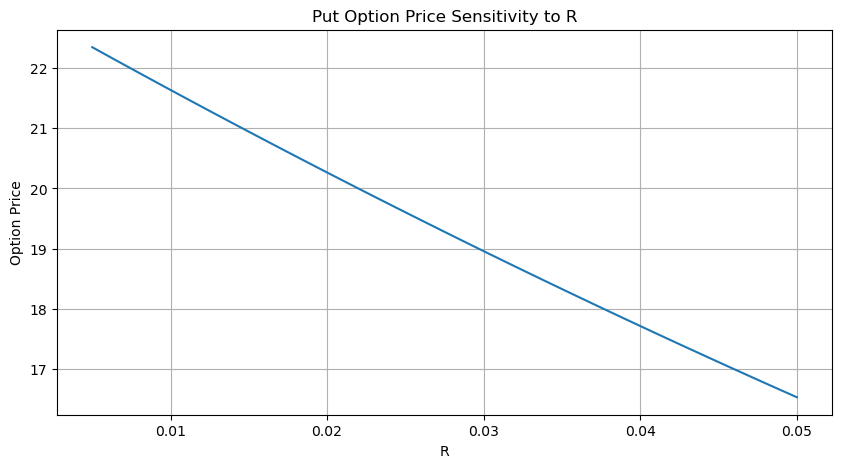

In [86]:
rates=np.linspace(0.005, 0.05, 100)
plot_option_sensitivity(bsm_5, 'r', rates, 'call')
plot_option_sensitivity(bsm_5, 'r', rates, 'put')

## conclusion  
How each parameter affects the call and put option prices are concluded in the following table, where "+" means positively correlated and "-" means negatively correlated  

|  |  call option   | put option  |
| :----: |  :----:  | :----:  |
| strike price |  -  | +  |
| maturity | +  | + |
| volatility | +  | + |
| risk free rate | +  | - |
